In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import matplotlib.pyplot as plt
from matplotlib import rc; rc('text', usetex=True)

## Age-structures

In [3]:
M=16  ## number of age classes

my_data = np.genfromtxt('../data/age_structures/Denmark-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

deM, deF = aM, aF

my_data = np.genfromtxt('../data/age_structures/UK.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

ukM, ukF = aM, aF

## Contact structures

In [4]:
chCH, chCW, chCS, chCO = pyross.contactMatrix.China()
deCH, deCW, deCS, deCO = pyross.contactMatrix.Denmark()
ukCH, ukCW, ukCS, ukCO = pyross.contactMatrix.UK()

### Using age and contact structures of the UK to evaluate $\mathcal R_0$

In [5]:
aH, aW, aS, aO = 1, 1, 1, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

Ni = (ukM + ukF)[0:M]

beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK)

The basic reproductive ratio for these parameters is (81.75599447582681+0j)


In [6]:
#now keep contacts only at home and evaluate r_0
aH, aW, aS, aO = 1, 0, 0, 0
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

Ni = (ukM + ukF)[0:M]

beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK)

The basic reproductive ratio for these parameters is (20.91298427906979+0j)


### Using age and contact structures of Denmark to evaluate $\mathcal R_0$

In [7]:
aH, aW, aS, aO = 1, 1, 1, 1
CH, CW, CS, CO = aH*deCH, aW*deCW, aS*deCS, aO*deCO

Ni = (deM + deF)[0:M]

beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics

parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0de = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0de)

The basic reproductive ratio for these parameters is (104.2773016896406+0j)


In [8]:
#now keep contacts only at home and evaluate r_0
aH, aW, aS, aO = 1, 0, 0, 0
CH, CW, CS, CO = aH*deCH, aW*deCW, aS*deCS, aO*deCO

Ni = (deM + deF)[0:M]

beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics

parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0de = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0de)

The basic reproductive ratio for these parameters is (23.513382175382233+0j)


## Basic reproductive ratio as a function of change in contacts

In [9]:
M=16  ## number of age classes
my_data = np.genfromtxt('../data/age_structures/UK.csv', delimiter=',', skip_header=1)
ukM , ukF = my_data[:, 1], my_data[:, 2]
Ni = (ukM + ukF)[0:M]

# contact structure of the UK
ukCH, ukCW, ukCS, ukCO = pyross.contactMatrix.UK()
aH, aW, aS, aO = 1, 1, 1, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO
 
    
beta  = 1               # the probability of infection on contact
gIa   = 1./7            # recovery rate of asymptomatic infectives 
gIs   = 1./7            # recovery rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'M':M, 'Ni':Ni}

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK1 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK1)

The basic reproductive ratio for these parameters is (81.75599447582681+0j)


In [10]:
aH, aW, aS, aO = 1, 0, 1, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK2 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK2)


aH, aW, aS, aO = 1, 0, 0, 1
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK3 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK3)

aH, aW, aS, aO = 1, 0, 0, 0
CH, CW, CS, CO = aH*ukCH, aW*ukCW, aS*ukCS, aO*ukCO

contactMatrix = pyross.contactMatrix.SIR(CH, CW, CS, CO)
r0UK4 = contactMatrix.basicReproductiveRatio(parameters)

print("The basic reproductive ratio for these parameters is", r0UK4)

The basic reproductive ratio for these parameters is (62.981977600135735+0j)
The basic reproductive ratio for these parameters is (43.446346534052125+0j)
The basic reproductive ratio for these parameters is (20.91298427906979+0j)


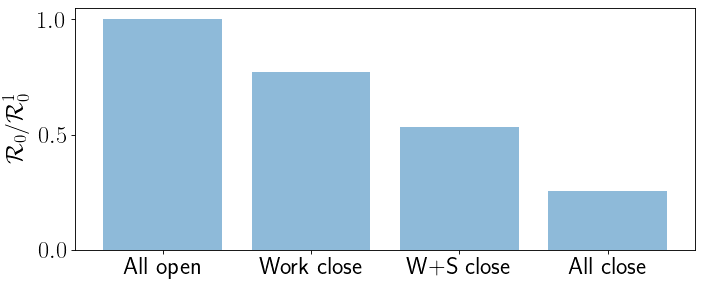

In [11]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


r0 = np.real(np.array([r0UK1, r0UK2, r0UK3, r0UK4])/r0UK1)
plt.bar(range(r0.size), r0, align='center', alpha=0.5);

labelY= ('All open', 'Work close', 'W+S close', 'All close' )
plt.xticks(range(r0.size),labelY); plt.ylabel(r'$\mathcal R_0/\mathcal R^{{1}}_0$');

## Basic reproductive ratio as a function of time

In [12]:
M = 1                  # the SIR model has no age structure
Ni = 1000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gIa   = 0.1            # recovery rate of asymptomatic infectives 
gIs   = 0.1            # recovery rate of symptomatic infectives 
alpha = 0              # fraction of asymptomatic infectives 
fsa   = 1              # the self-isolation parameter 


Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no recovered individuals initially 
S0  = N-(Ia0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 160;  Nt=160; 

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SIR(parameters, M, Ni)

# simulate model 
data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)

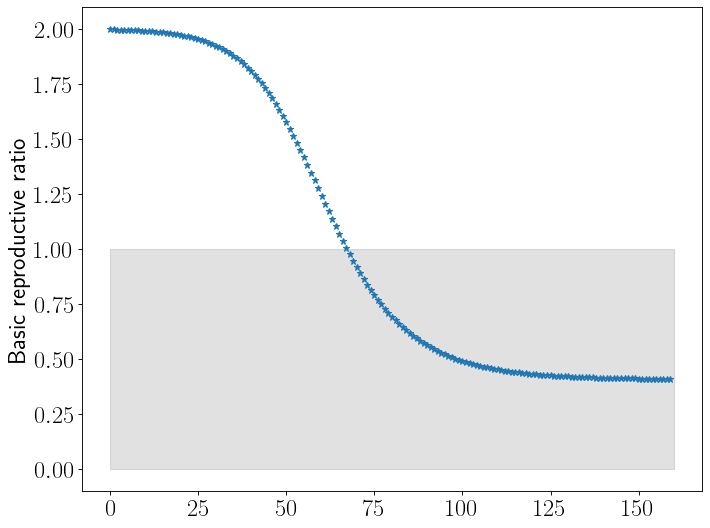

In [13]:
C=np.identity(M)
contactMatrix = pyross.contactMatrix.SIR(0.25*C, 0.25*C, 0.25*C, 0.25*C)
r0de = contactMatrix.basicReproductiveRatio(data, state='dynamic')

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(data['t'], 0, 1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.plot(r0de, '*');